# BATTLE OF RESTAURANT LOCATIONS

*Xuan Nhi Ha*

# Business Problem

A business owner of a Vietnamese restaurant in California is looking to open a new branch in New York city. As a business analyst, I am going to help him define the suitable location for this new restaurant.

# Dataset

As the defined region is New York city. I will use the data sources from 'https://en.wikipedia.org/wiki/New_York_City' and 'https://en.wikipedia.org/wiki/Demographics_of_New_York_City' to get input of its population density and demographics data. 
Moreover, to explore the neighborhoods in New York, the dataset from 'https://cocl.us/new_york_dataset' and Foursquare API will also be used to solve and execute and business problem mentioned above.

# Methodology

First, discover the population overall in New York city by applying the dataset from Wikipedia.

In [4]:
# Import necessary packages
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge folium=0.5.0 --yes

import os
import folium # map rendering library
# Matplotlib and associated plotting modules

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mp
import re
import csv
%matplotlib inline


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

Then, explore and prepare the data for the table of race in each jurisdiction

In [6]:
response_obj = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup = BeautifulSoup(response_obj,'lxml')
Neighborhoods_NYC_Table = soup.find('table', {'class':'wikitable sortable'})

rows = Neighborhoods_NYC_Table.select("tbody > tr")[3:8]

boroughs = []
for row in rows:
    borough = {}
    tds = row.select('td')
    borough["borough"] = tds[0].text.strip()
    borough["county"] = tds[1].text.strip()
    borough["population"] = float(tds[2].text.strip().replace(",",""))
    borough["gdp_billions"] = float(tds[3].text.strip().replace(",",""))
    borough["gdp_per_capita"] = float(tds[4].text.strip().replace(",",""))
    borough["land_sqm"] = float(tds[5].text.strip().replace(",",""))
    borough["land_sqkm"] = float(tds[6].text.strip().replace(",",""))
    borough["persons_sqm"] = float(tds[7].text.strip().replace(",",""))
    borough["persons_sqkm"] = float(tds[8].text.strip().replace(",",""))
    
    boroughs.append(borough)

print(boroughs)

[{'borough': 'The Bronx', 'county': 'Bronx', 'population': 1418207.0, 'gdp_billions': 42.695, 'gdp_per_capita': 30100.0, 'land_sqm': 42.1, 'land_sqkm': 109.04, 'persons_sqm': 33867.0, 'persons_sqkm': 13006.0}, {'borough': 'Brooklyn', 'county': 'Kings', 'population': 2559903.0, 'gdp_billions': 91.559, 'gdp_per_capita': 35800.0, 'land_sqm': 70.82, 'land_sqkm': 183.42, 'persons_sqm': 36147.0, 'persons_sqkm': 13957.0}, {'borough': 'Manhattan', 'county': 'New York', 'population': 1628706.0, 'gdp_billions': 600.244, 'gdp_per_capita': 368500.0, 'land_sqm': 22.83, 'land_sqkm': 59.13, 'persons_sqm': 71341.0, 'persons_sqkm': 27544.0}, {'borough': 'Queens', 'county': 'Queens', 'population': 2253858.0, 'gdp_billions': 93.31, 'gdp_per_capita': 41400.0, 'land_sqm': 108.53, 'land_sqkm': 281.09, 'persons_sqm': 20767.0, 'persons_sqkm': 8018.0}, {'borough': 'Staten Island', 'county': 'Richmond', 'population': 476143.0, 'gdp_billions': 14.514, 'gdp_per_capita': 30500.0, 'land_sqm': 58.37, 'land_sqkm': 15

In [7]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(response_obj,'lxml')
Population_Census_Table = soup.select_one('.wikitable:nth-of-type(5)') #use css selector to target correct table.

jurisdictions = []
rows = Population_Census_Table.select("tbody > tr")[3:8]
for row in rows:
    jurisdiction = {}
    tds = row.select('td')
    jurisdiction["jurisdiction"] = tds[0].text.strip()
    jurisdiction["population_census"] = tds[1].text.strip()
    jurisdiction["%_white"] = float(tds[2].text.strip().replace(",",""))
    jurisdiction["%_black_or_african_amercian"] = float(tds[3].text.strip().replace(",",""))
    jurisdiction["%_Asian"] = float(tds[4].text.strip().replace(",",""))
    jurisdiction["%_other"] = float(tds[5].text.strip().replace(",",""))
    jurisdiction["%_mixed_race"] = float(tds[6].text.strip().replace(",",""))
    jurisdiction["%_hispanic_latino_of_other_race"] = float(tds[7].text.strip().replace(",",""))
    jurisdiction["%_catholic"] = float(tds[10].text.strip().replace(",",""))
    jurisdiction["%_jewish"] = float(tds[12].text.strip().replace(",",""))
    jurisdictions.append(jurisdiction)

print(jurisdictions)

[{'jurisdiction': 'Queens', 'population_census': '2,229,379', '%_white': 44.1, '%_black_or_african_amercian': 20.0, '%_Asian': 17.6, '%_other': 12.3, '%_mixed_race': 6.1, '%_hispanic_latino_of_other_race': 25.0, '%_catholic': 37.0, '%_jewish': 5.0}, {'jurisdiction': 'Manhattan', 'population_census': '1,537,195', '%_white': 54.4, '%_black_or_african_amercian': 17.4, '%_Asian': 9.4, '%_other': 14.7, '%_mixed_race': 4.1, '%_hispanic_latino_of_other_race': 27.2, '%_catholic': 11.0, '%_jewish': 9.0}, {'jurisdiction': 'Bronx', 'population_census': '1,332,650', '%_white': 29.9, '%_black_or_african_amercian': 35.6, '%_Asian': 3.0, '%_other': 25.7, '%_mixed_race': 5.8, '%_hispanic_latino_of_other_race': 48.4, '%_catholic': 14.0, '%_jewish': 5.0}, {'jurisdiction': 'Staten Island', 'population_census': '443,728', '%_white': 77.6, '%_black_or_african_amercian': 9.7, '%_Asian': 5.7, '%_other': 4.3, '%_mixed_race': 2.7, '%_hispanic_latino_of_other_race': 12.1, '%_catholic': 11.0, '%_jewish': 5.0}, {

In [8]:
# Prepare the dataframe
df = pd.DataFrame(jurisdictions, columns=["jurisdiction","%_white", "%_black_or_african_amercian", "%_Asian", "%_other", "%_mixed_race", "%_hispanic_latino_of_other_race"])
df.head()

,jurisdiction,%_white,%_black_or_african_amercian,%_Asian,%_other,%_mixed_race,%_hispanic_latino_of_other_race
0,Queens,44.1,20.0,17.6,12.3,6.1,25.0
1,Manhattan,54.4,17.4,9.4,14.7,4.1,27.2
2,Bronx,29.9,35.6,3.0,25.7,5.8,48.4
3,Staten Island,77.6,9.7,5.7,4.3,2.7,12.1
4,NYC Total,44.7,26.6,9.8,14.0,4.9,27.0


We can see that Queens has the the highest Asian ethnic population in New York with 17.6%, following is Manhattan with the ratio of 9.4%.

# Moving to explore the neighbourhoods and consider the restaurant rating for each Vietnamese restaurants venues

I will use FourSquare API and the dataset from 'https://cocl.us/new_york_dataset' that contains list Boroughs, Neighbourhoods along with their latitude and longitude.

In [9]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    locatidn = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

Define a function to intract with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude.

In [11]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = '3FS5BW5P540VDN0JKEO0RRMWXG5SU1AYSIWHR3DTSJB5EVY0'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='1DYVVMRABCEMFTJ1KS0XXKILUVWDDMFF3GQIKCBLR4BXOEGW' # Foursquare Secret, note there is a daily call quota it
    VERSION = '20201106' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Define a ranking function based on venue details with the elements including count , rating , tip counts for a given venue id.

In [13]:
def get_venue_details(venue_id):
        
    CLIENT_ID = '3FS5BW5P540VDN0JKEO0RRMWXG5SU1AYSIWHR3DTSJB5EVY0'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='1DYVVMRABCEMFTJ1KS0XXKILUVWDDMFF3GQIKCBLR4BXOEGW' # Foursquare Secret, note there is a daily call quota it it
    VERSION = '20201106' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Define a funtion to get the New York city data such as Boroughs, Neighborhoods along with their latitude and longitude.

In [14]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

Acquire New York dataset and display the first 5 rows.

In [15]:
new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [16]:
new_york_data.shape

(306, 4)

We then have the result of 306 neighborhoods to consider for the restaurant locations.

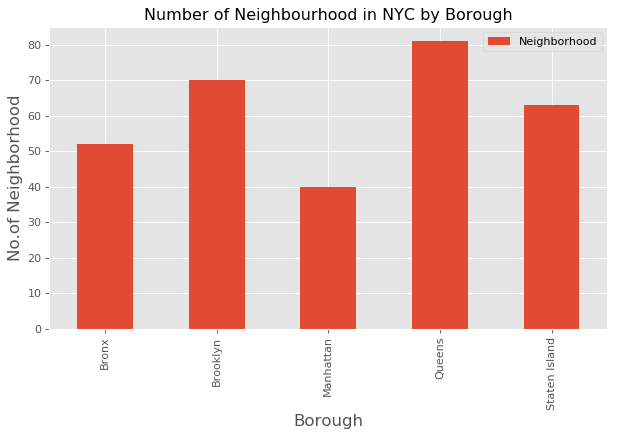

In [18]:
# Visualize the number of neighborhoods in NYC
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Number of Neighbourhood in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
plt.show()

In [58]:
# Prepare neighborhood list that contains vietnamese restaurant
column_names=['Borough', 'Neighborhood', 'ID','Name']
vietnamese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    vietnamese_restaurants=venues[venues['Category']=='Vietnamese Restaurant']   
    print('(',count,'/',len(new_york_data),')','Vietnamese Restaurants in '+Neighborhood+', '+Borough+':'+str(len(vietnamese_restaurants)))
    for restaurant_detail in vietnamese_restaurants.values.tolist():
        id, name , category=restaurant_detail
        vietnamese_rest_ny = vietnamese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Vietnamese Restaurants in Wakefield, Bronx:0
( 2 / 306 ) Vietnamese Restaurants in Co-op City, Bronx:0
( 3 / 306 ) Vietnamese Restaurants in Eastchester, Bronx:0
( 4 / 306 ) Vietnamese Restaurants in Fieldston, Bronx:0
( 5 / 306 ) Vietnamese Restaurants in Riverdale, Bronx:0
( 6 / 306 ) Vietnamese Restaurants in Kingsbridge, Bronx:0
( 7 / 306 ) Vietnamese Restaurants in Marble Hill, Manhattan:0
( 8 / 306 ) Vietnamese Restaurants in Woodlawn, Bronx:0
( 9 / 306 ) Vietnamese Restaurants in Norwood, Bronx:0
( 10 / 306 ) Vietnamese Restaurants in Williamsbridge, Bronx:0
( 11 / 306 ) Vietnamese Restaurants in Baychester, Bronx:0
( 12 / 306 ) Vietnamese Restaurants in Pelham Parkway, Bronx:0
( 13 / 306 ) Vietnamese Restaurants in City Island, Bronx:0
( 14 / 306 ) Vietnamese Restaurants in Bedford Park, Bronx:0
( 15 / 306 ) Vietnamese Restaurants in University Heights, Bronx:0
( 16 / 306 ) Vietnamese Restaurants in Morris Heights, Bronx:0
( 17 / 306 ) Vietnamese Restaurants in Ford

( 132 / 306 ) Vietnamese Restaurants in Jackson Heights, Queens:1
( 133 / 306 ) Vietnamese Restaurants in Elmhurst, Queens:3
( 134 / 306 ) Vietnamese Restaurants in Howard Beach, Queens:0
( 135 / 306 ) Vietnamese Restaurants in Corona, Queens:0
( 136 / 306 ) Vietnamese Restaurants in Forest Hills, Queens:0
( 137 / 306 ) Vietnamese Restaurants in Kew Gardens, Queens:0
( 138 / 306 ) Vietnamese Restaurants in Richmond Hill, Queens:0
( 139 / 306 ) Vietnamese Restaurants in Flushing, Queens:2
( 140 / 306 ) Vietnamese Restaurants in Long Island City, Queens:0
( 141 / 306 ) Vietnamese Restaurants in Sunnyside, Queens:0
( 142 / 306 ) Vietnamese Restaurants in East Elmhurst, Queens:0
( 143 / 306 ) Vietnamese Restaurants in Maspeth, Queens:0
( 144 / 306 ) Vietnamese Restaurants in Ridgewood, Queens:0
( 145 / 306 ) Vietnamese Restaurants in Glendale, Queens:0
( 146 / 306 ) Vietnamese Restaurants in Rego Park, Queens:0
( 147 / 306 ) Vietnamese Restaurants in Woodhaven, Queens:0
( 148 / 306 ) Vietn

( 259 / 306 ) Vietnamese Restaurants in Elm Park, Staten Island:0


KeyError: 'groups'

In [59]:
vietnamese_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Fordham,4aee2a4bf964a520a2d221e3,Cơm Tấm Ninh Kiều
1,Brooklyn,Bay Ridge,4af861e3f964a520bc0c22e3,Pho Hoai Bay Ridge
2,Brooklyn,Bensonhurst,5a5aaf7cc8b2fb7e920360f0,Em Vietnamese Restaurant
3,Brooklyn,Sunset Park,49e4cedbf964a5204f631fe3,Ba Xuyên
4,Brooklyn,Sunset Park,4aaea05bf964a520aa6220e3,Thanh Da


In [60]:
vietnamese_rest_ny.shape

(52, 4)

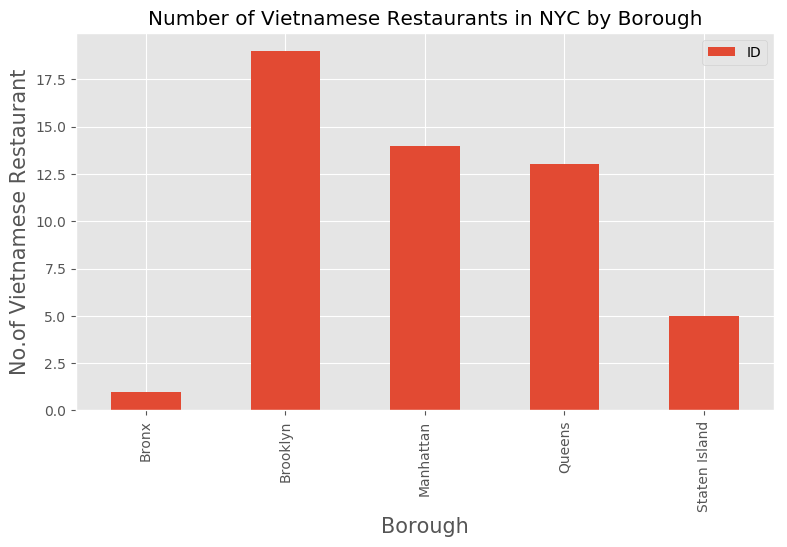

In [61]:
# Visualize the number of Vietnamese restaurants in each borough 

from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Vietnamese Restaurants in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Vietnamese Restaurant', fontsize=15)
#giving a bar plot
vietnamese_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Based on the chart, Brooklyn has the highest number of Vietnamese restaurants especially in Sunset Park with the most crowded number.

In [25]:
vietnamese_rest_ny[vietnamese_rest_ny['Neighborhood']=='Sunset Park']

,Borough,Neighborhood,ID,Name
3,Brooklyn,Sunset Park,49e4cedbf964a5204f631fe3,Ba Xuyên
4,Brooklyn,Sunset Park,4aaea05bf964a520aa6220e3,Thanh Da
5,Brooklyn,Sunset Park,4ad25b45f964a5201ce120e3,Gia Lam


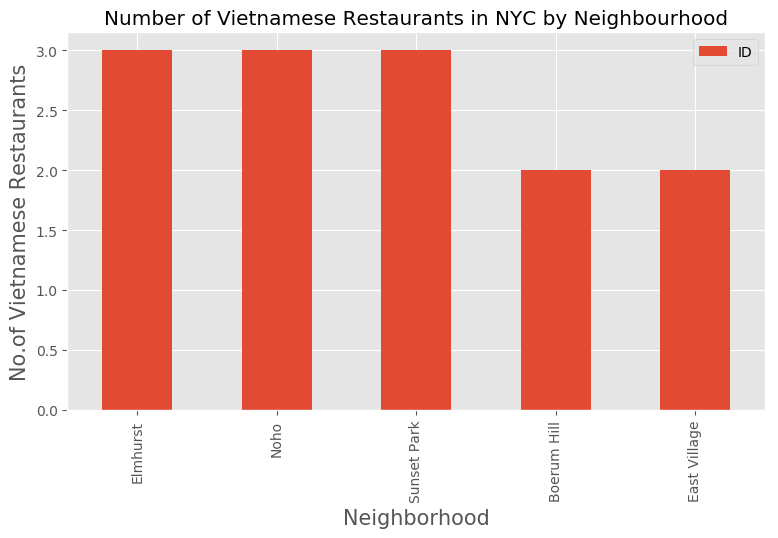

In [62]:
# Explore the number of VNmese restaurants by Neighborhood
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Vietnamese Restaurants in NYC by Neighbourhood')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Vietnamese Restaurants', fontsize=15)
#giving a bar plot
vietnamese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Sunset Park in Brooklyn still has the highest number of VNmese restaurants toghether with Elmhurst in Queens and Noho in Manhattan.

In [63]:
# Prepare neighborhood list that contains vietnamese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
vietnamese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in vietnamese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row

    # prepare neighborhood list that contains vietnamese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
vietnamese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in vietnamese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(vietnamese_rest_ny),')','processed')
    vietnamese_rest_stats_ny = vietnamese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID               Name  Likes  Rating  Tips
0  4aee2a4bf964a520a2d221e3  Cơm Tấm Ninh Kiều     52     7.6    34
( 1 / 52 ) processed
                         ID                Name  Likes  Rating  Tips
0  4af861e3f964a520bc0c22e3  Pho Hoai Bay Ridge     36     7.3    27
( 2 / 52 ) processed
                         ID                      Name  Likes  Rating  Tips
0  5a5aaf7cc8b2fb7e920360f0  Em Vietnamese Restaurant     18     8.2    10
( 3 / 52 ) processed
                         ID      Name  Likes  Rating  Tips
0  49e4cedbf964a5204f631fe3  Ba Xuyên    155     9.1    74
( 4 / 52 ) processed
                         ID      Name  Likes  Rating  Tips
0  4aaea05bf964a520aa6220e3  Thanh Da     58     7.9    29
( 5 / 52 ) processed
                         ID     Name  Likes  Rating  Tips
0  4ad25b45f964a5201ce120e3  Gia Lam     14     6.5    11
( 6 / 52 ) processed
                         ID      Name  Likes  Rating  Tips
0  5aa427100a464d2cf717b688  Đi ăn Đi  

In [64]:
vietnamese_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Fordham,4aee2a4bf964a520a2d221e3,Cơm Tấm Ninh Kiều,52,7.6,34
1,Brooklyn,Bay Ridge,4af861e3f964a520bc0c22e3,Pho Hoai Bay Ridge,36,7.3,27
2,Brooklyn,Bensonhurst,5a5aaf7cc8b2fb7e920360f0,Em Vietnamese Restaurant,18,8.2,10
3,Brooklyn,Sunset Park,49e4cedbf964a5204f631fe3,Ba Xuyên,155,9.1,74
4,Brooklyn,Sunset Park,4aaea05bf964a520aa6220e3,Thanh Da,58,7.9,29


In [65]:
vietnamese_rest_stats_ny.shape

(52, 7)

In [66]:
vietnamese_rest_stats_ny.to_csv('vietnamese_rest_stats_ny.csv', index=False)

In [67]:
vietnamese_rest_stats_ny_csv=pd.read_csv('vietnamese_rest_stats_ny.csv')

In [68]:
vietnamese_rest_stats_ny_csv.shape

(52, 7)

In [69]:
vietnamese_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Fordham,4aee2a4bf964a520a2d221e3,Cơm Tấm Ninh Kiều,52,7.6,34
1,Brooklyn,Bay Ridge,4af861e3f964a520bc0c22e3,Pho Hoai Bay Ridge,36,7.3,27
2,Brooklyn,Bensonhurst,5a5aaf7cc8b2fb7e920360f0,Em Vietnamese Restaurant,18,8.2,10
3,Brooklyn,Sunset Park,49e4cedbf964a5204f631fe3,Ba Xuyên,155,9.1,74
4,Brooklyn,Sunset Park,4aaea05bf964a520aa6220e3,Thanh Da,58,7.9,29


In [70]:
vietnamese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
Borough         52 non-null object
Neighborhood    52 non-null object
ID              52 non-null object
Name            52 non-null object
Likes           52 non-null object
Rating          52 non-null float64
Tips            52 non-null object
dtypes: float64(1), object(6)
memory usage: 2.9+ KB


In [71]:
vietnamese_rest_stats_ny['Likes']=vietnamese_rest_stats_ny['Likes'].astype('float64')

In [72]:
vietnamese_rest_stats_ny['Tips']=vietnamese_rest_stats_ny['Tips'].astype('float64')

In [73]:
vietnamese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
Borough         52 non-null object
Neighborhood    52 non-null object
ID              52 non-null object
Name            52 non-null object
Likes           52 non-null float64
Rating          52 non-null float64
Tips            52 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [74]:
# Restaurants with maximum Likes
vietnamese_rest_stats_ny.iloc[vietnamese_rest_stats_ny['Likes'].idxmax()]

Borough                                         Brooklyn
Neighborhood                                    Downtown
ID                              49e63b96f964a52028641fe3
Name            Hanco's Bubble Tea & Vietnamese Sandwich
Likes                                                368
Rating                                               8.4
Tips                                                 142
Name: 15, dtype: object

In [75]:
# Restaurants with maximum Rating
vietnamese_rest_stats_ny.iloc[vietnamese_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood             Lower East Side
ID              59ef714242d8c27c6dc8ef5e
Name                 Ginger & Lemongrass
Likes                                124
Rating                               9.2
Tips                                  29
Name: 26, dtype: object

In [76]:
# Restaurants with maximum Tips
vietnamese_rest_stats_ny.iloc[vietnamese_rest_stats_ny['Tips'].idxmax()]

Borough                                         Brooklyn
Neighborhood                                    Downtown
ID                              49e63b96f964a52028641fe3
Name            Hanco's Bubble Tea & Vietnamese Sandwich
Likes                                                368
Rating                                               8.4
Tips                                                 142
Name: 15, dtype: object

In [77]:
ny_neighborhood_stats=vietnamese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [78]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
24,Greenpoint,8.80
14,East Village,8.75
28,Lower East Side,8.75
15,East Williamsburg,8.70
6,Boerum Hill,8.60
19,Fort Greene,8.40
10,Clinton Hill,8.40
26,Lincoln Square,8.40
12,Downtown,8.40
29,Manhattan Valley,8.40


In [79]:
ny_borough_stats=vietnamese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [80]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Brooklyn,8.026316
0,Bronx,7.600000
2,Manhattan,5.464286
3,Queens,0.000000
4,Staten Island,0.000000


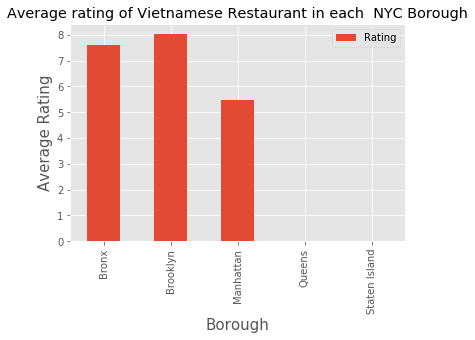

In [81]:
# Visualize the average rating of VNmese restaurant 

# title
plt.title('Average rating of Vietnamese Restaurant in each  NYC Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
vietnamese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Brooklyn also has the highest average rating for VNmese restaurants.

In [82]:
# Visualize the neighborhoods with average rating greater or equal 8.0 
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
5,Bensonhurst,8.20
6,Boerum Hill,8.60
9,Chinatown,8.20
10,Clinton Hill,8.40
12,Downtown,8.40
14,East Village,8.75
15,East Williamsburg,8.70
19,Fort Greene,8.40
24,Greenpoint,8.80
26,Lincoln Square,8.40


In [83]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Neighborhood,Latitude,Longitude,Average Rating
8,Brooklyn,Greenpoint,40.730201,-73.954241,8.80
5,Manhattan,East Village,40.727847,-73.982226,8.75
10,Manhattan,Lower East Side,40.717807,-73.980890,8.75
6,Brooklyn,East Williamsburg,40.708492,-73.938858,8.70
1,Brooklyn,Boerum Hill,40.685683,-73.983748,8.60
3,Brooklyn,Clinton Hill,40.693229,-73.967843,8.40
4,Brooklyn,Downtown,40.690844,-73.983463,8.40
7,Brooklyn,Fort Greene,40.688527,-73.972906,8.40
9,Manhattan,Lincoln Square,40.773529,-73.985338,8.40
11,Manhattan,Manhattan Valley,40.797307,-73.964286,8.40


In [84]:
# create map and display it
ny_map = folium.Map(location=(40.693943, -73.985880), zoom_start=12)

In [85]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [88]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [89]:
# Put on map best neighbourhoods in New York that has highest average rating for VNmese restaurants

# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

# Result

- Manhattan is beyond the top highest Asian ethnic population in New York city.
- Brooklyn has the highest number of Vietnamese restaurants especially in Sunset Park with the most crowded number.
- Greenpoint, East Williamsburg in Brooklyn and East Village, Lower East Side in Manhattan are among the best neighborhoods for Vietnamese cuisine with highest rating.
- Downtown in Brooklyn receives the highest tip.

# Discussion & Recommendation

Manhattan in New York city will be the best choice for the Vietnamese restaurant owner because it is the third most populous urban area in New York City with the highest population density and in the top list of Asian ethnic population in New York. Moreover, it possesses of the top rated Vietnamese restaurants located in that area.

Brooklyn will be the second choice because of its highest density of Vietnamese restaurants especially in Sunset Park and has the highest rating for VNmese cuisine.